In [57]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [58]:
df = pd.read_csv("multiple_linear_regression_dataset.csv")

In [59]:
df.head()


,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [60]:
x_train = df['experience']
y_train = df['income']

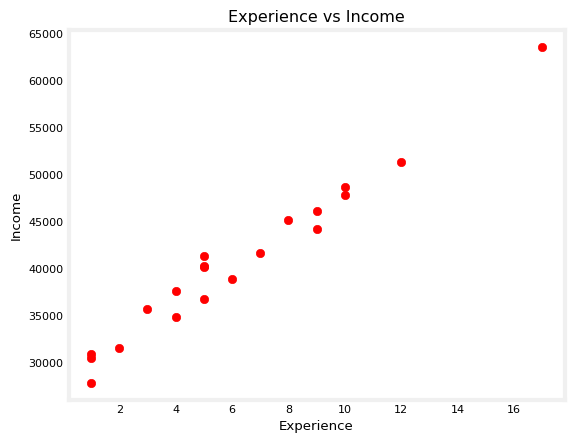

In [61]:
plt.scatter(x_train,y_train, c='r')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Experience vs Income')
plt.show()

In [62]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w*x[i]+b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = (1/(2*m)) * cost_sum
    return total_cost

In [63]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [64]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [65]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.63e+08  dj_dw: -2.851e+05, dj_db: -4.074e+04   w:  2.851e+03, b: 4.07355e+02
Iteration 1000: Cost 1.38e+06  dj_dw:  4.946e+01, dj_db: -4.332e+02   w:  2.183e+03, b: 2.67702e+04
Iteration 2000: Cost 1.06e+06  dj_dw:  2.651e+00, dj_db: -2.322e+01   w:  2.023e+03, b: 2.81692e+04
Iteration 3000: Cost 1.06e+06  dj_dw:  1.421e-01, dj_db: -1.245e+00   w:  2.015e+03, b: 2.82442e+04
Iteration 4000: Cost 1.06e+06  dj_dw:  7.618e-03, dj_db: -6.673e-02   w:  2.014e+03, b: 2.82482e+04
Iteration 5000: Cost 1.06e+06  dj_dw:  4.084e-04, dj_db: -3.577e-03   w:  2.014e+03, b: 2.82484e+04
Iteration 6000: Cost 1.06e+06  dj_dw:  2.189e-05, dj_db: -1.917e-04   w:  2.014e+03, b: 2.82484e+04
Iteration 7000: Cost 1.06e+06  dj_dw:  1.173e-06, dj_db: -1.028e-05   w:  2.014e+03, b: 2.82484e+04
Iteration 8000: Cost 1.06e+06  dj_dw:  6.289e-08, dj_db: -5.510e-07   w:  2.014e+03, b: 2.82484e+04
Iteration 9000: Cost 1.06e+06  dj_dw:  3.364e-09, dj_db: -2.954e-08   w:  2.014e+03, b: 2.82484e+04


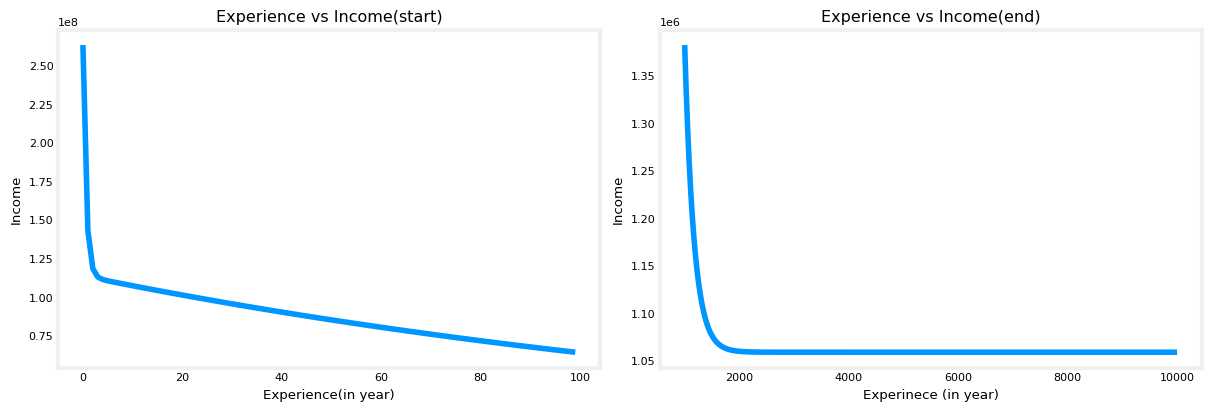

In [51]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Experience vs Income(start)");  ax2.set_title("Experience vs Income(end)")
ax1.set_ylabel('Income')            ;  ax2.set_ylabel('Income') 
ax1.set_xlabel('Experience(in year)')  ;  ax2.set_xlabel('Experinece (in year)') 
plt.show()


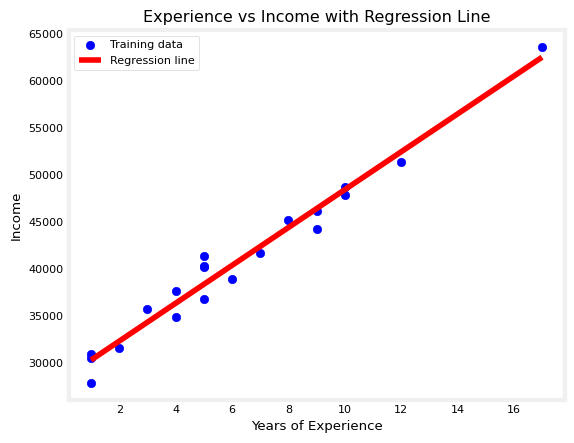

In [55]:
x_vals = np.array([x_train.min(), x_train.max()])

y_vals = w_final * x_vals + b_final

# plot original data points
plt.scatter(x_train, y_train, color='blue', label='Training data')

# Plot regression line
plt.plot(x_vals, y_vals, color='red', label='Regression line')

plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.title('Experience vs Income with Regression Line')
plt.legend()

plt.show()

In [56]:
# Example: Predict income for someone with 5 years of experience
experience_new = 5
predicted_income = w_final * experience_new + b_final

print(f"Predicted income for {experience_new} years of experience is: {predicted_income:.2f}")


Predicted income for 5 years of experience is: 38318.65
